
# Plane Crash!
Author: **Keanu Richards and Ben Grant**

Run the cell below each time the notebook is started or restarted to ensure that if you change any code in the library, this notebook will use the latest version of the library code.

In [1]:
%load_ext autoreload
%autoreload 2


## Crashes by year over time

In [2]:
import dateparser as dp
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv("all_data.csv")

In [3]:
dates = data["Date:"]

crashes_by_year = {}

for date in dates:
    # if crashes_by_year

    # use date parser on date:
    year = dp.parse(date).year

    if year in crashes_by_year:
        crashes_by_year[year] += 1
    else:
        crashes_by_year[year] = 1

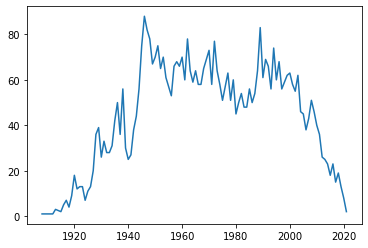

In [4]:
plt.plot(crashes_by_year.keys(), crashes_by_year.values())
plt.show()

In [5]:
# dictionary to hold each crash year (keys) and the total number of crashes that year (values)
crashes_by_month = {}

for date in dates:
    # use date parser on date:
    month = dp.parse(date).month

    # build dictionary
    if month in crashes_by_month:
        crashes_by_month[month] += 1
    else:
        crashes_by_month[month] = 1

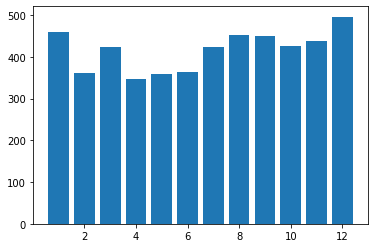

In [6]:
plt.bar(crashes_by_month.keys(), crashes_by_month.values())
plt.show()

## Plans / next steps:
- Get total flights from 2000-2020 data
    - Normalize the crash data by totals for each year
    - Research what has changed in the industry
    - go by month if the plot is too stoneage
- Fatalities
    - How fatal is the average plane crash
    - expecting to see low death count early on, get higher as time runs on (planes got bigger), will probably trail off in late years
- find cool data visualiztions to do for a third something to look at
    

## Plotting flights from 2000 to 2020:

In [7]:
# flights from 2000 - 2020
flights_by_month = pd.read_csv("Air_Traffic.csv")

# dictionary to hold each flight year (keys) and the total number of flights that year (values)
flights_by_year = {}

for _, flight in flights_by_month.iterrows():
    # use date parser on date:
    year = dp.parse(flight["Period"]).year

    # build dictionary
    if year in flights_by_year:
        flights_by_year[year] += flight["Total"]
    else:
        flights_by_year[year] = flight["Total"]

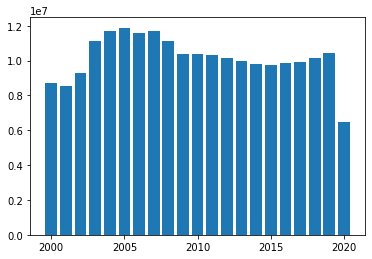

In [8]:
plt.bar(flights_by_year.keys(), flights_by_year.values())
plt.show()

## Normalizing crashes from 2000 to 2020:

In [11]:
# dataframe of all crashes from the crashes_by_year dictionary
crashes_by_year_all_time = pd.DataFrame(crashes_by_year.items(), columns = ["year", "crashes"])

# select crashes from years 2000 to 2020
crashes_00_20 = crashes_by_year_all_time.loc[crashes_by_year_all_time['year'].isin(range(2000, 2021))].reset_index(drop=True)

# build dataframe for flights from years 2000 to 2020
flights_00_20 = pd.DataFrame(flights_by_year.items(), columns = ["year", "flights"])


## build final dataframe:

flights_and_crashes = flights_00_20
flights_and_crashes["crashes"] = crashes_00_20["crashes"]
# normalize crashes by year
flights_and_crashes["normalized"] = [ row["crashes"]/row["flights"] for _, row in flights_00_20.iterrows()]

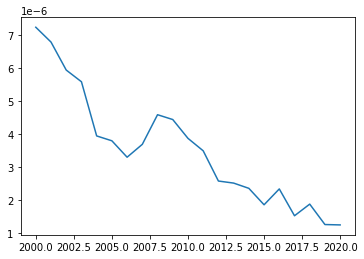

In [12]:
plt.plot(flights_and_crashes["year"], flights_and_crashes["normalized"])
plt.show()

## Fatalities (total per year)

In [37]:
# import dateparser as dp
# import pandas as pd
# import matplotlib.pyplot as plt

fatalities = data[["Date:","Fatalities:"]]
# dates = data["Date:"]

fatalities_by_year = {}

for _, row in fatalities.iterrows():
    # if fatalities_by_year 

    # split the Fatalities String at the integer representing total deaths
    deaths = row["Fatalities:"].split(" ", 1)[0]
    
    if deaths == "?":
        deaths = 0
    else:
        deaths = int(deaths)

    year = dp.parse(row["Date:"]).year
    
#     print(f"year: {year}  |  deaths: {deaths}")

    if year in fatalities_by_year:
        fatalities_by_year[year] += deaths
    else: 
        fatalities_by_year[year] = deaths

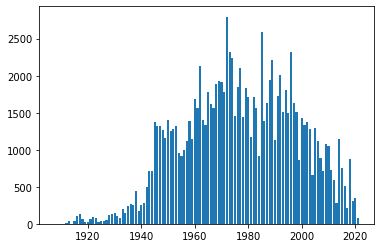

In [40]:
plt.bar(fatalities_by_year.keys(), fatalities_by_year.values())
plt.show()

## Have:
- crashes/year
- crashes / month
- flights / year (2000-2020)
- crashes/flight (2000-2020)
- fatalitites/year

## Timeline:

### Fatalities:
- first ever
- first >= 100

### Description:
- lightning : "lightning"
- terrorism : "terrorism"
- Amelia Earhart : "Amelia Earhart 40"
- 9/11
- First midair collision
- Grand Canyon crash

### Flight no.:
- Maylasia 370